<a href="https://colab.research.google.com/gist/annaamikom/cb97ae901090a0220d0271a8f583892d/11-jurnal-k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lembar Kerja Praktikum:**
* Mata Kuliah :BDDM
* Pertemuan Ke : 22
* CPMK: Mahasiswa Mampu Menerapkan Metode Analisis Data (CPMK 21)
* Sub CPMK: Mahasiswa dapat menjelaskan konsep dasar dan cara kerja algoritma clustering (un-supervised learning) (SCPMK 1682111)
* Indikator Keberhasilan: Mahasiswa penyelesaian contoh kasus clustering dalam bahasa pemrograman

### **Identitas Praktikan:**
* Nama: Abizar Dzikri Mahardika
* Nim: 23.11.5767
* Kelas: IF-BigData1

### **Petunjuk Praktikum:**
* LINK DATASET: https://s.amikom.ac.id/DATASET-MALLCUSTOMER

### **K Means**
Metode K-means merupakan metode clustering yang paling sederhana dan umum. Hal ini dikarenakan K-means mempunyai kemampuan mengelompokkan data dalam jumlah yang cukup besar dengan waktu komputasi yang cepat dan efisien.

**Inertia** mengukur seberapa dekat data-data dalam satu cluster terhadap centroid-nya.


*   Semakin kecil nilai inertia → cluster semakin rapat dan homogen, cluster semakin baik
*   Semakin besar nilai inertia → cluster semakin menyebar & hasil cluster kurang baik




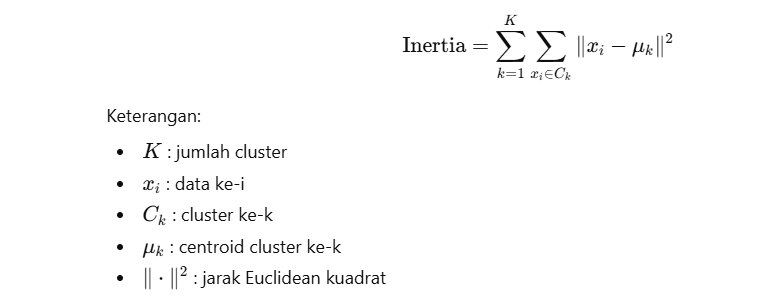

**WCSS (Within-Cluster Sum of Squares)** adalah ukuran kekompakan cluster pada algoritma clustering (terutama K-Means).
WCSS menghitung total jarak kuadrat antara setiap data dan centroid cluster tempat data tersebut berada.

**WCSS** mengukur seberapa rapat data di dalam masing-masing cluster.
Semakin kecil nilai WCSS → cluster semakin kompak.

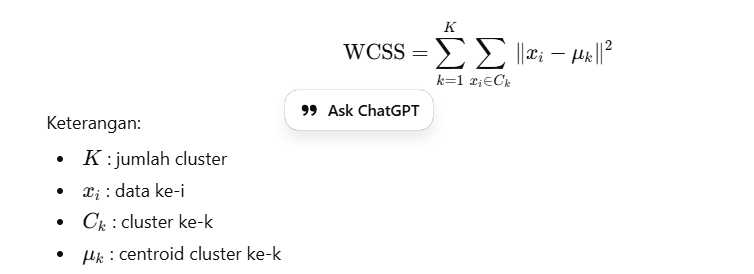

Elbow method: titik di mana penurunan WCSS mulai melambat(titik siku)

**Silhouette Score** adalah metrik evaluasi clustering yang mengukur seberapa baik setiap data ditempatkan di dalam cluster-nya dengan mempertimbangkan kekompakan (within-cluster) dan pemisahan (between-cluster).

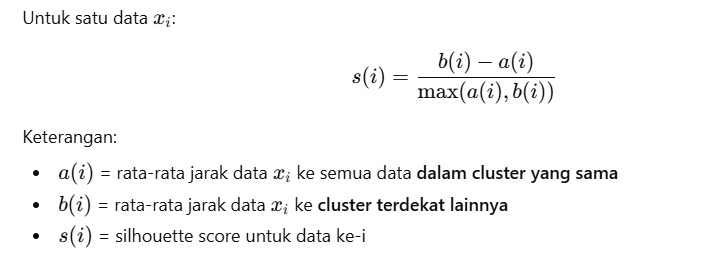

### **1. Import Library**



In [61]:
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Determine number of clusters
from sklearn.metrics import silhouette_score

### **2. Load Dataset**

In [62]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [63]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **3. Visualisasi Data**

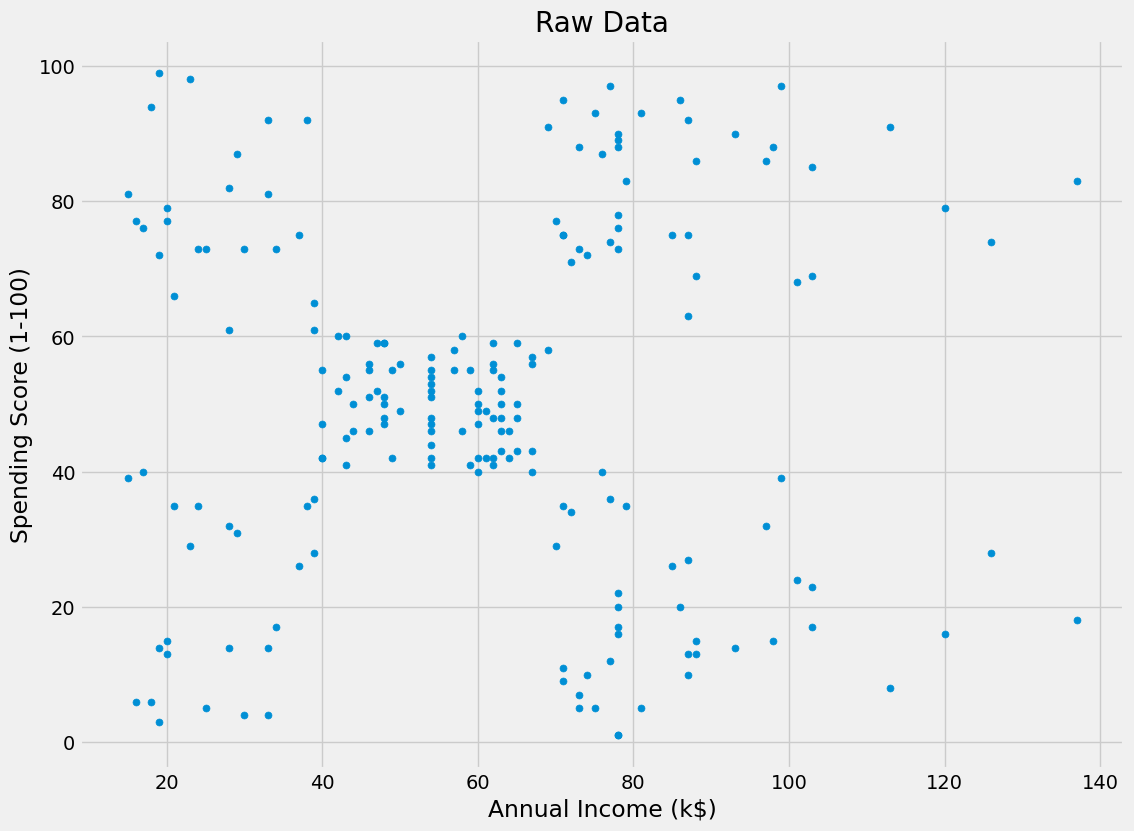

In [65]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 25) #Point size is 25
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



---



**Interpretaasi**

>Dataset terdiri dari 200 data pelanggan dengan 5 variabel, yaitu CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1–100), di mana sebagian besar bertipe numerik dan tidak terdapat data kosong. Visualisasi scatter plot antara Annual Income dan Spending Score menunjukkan sebaran pelanggan berdasarkan tingkat pendapatan tahunan dan pola pengeluaran mereka. Titik-titik yang tersebar menggambarkan bahwa pelanggan dengan pendapatan yang sama dapat memiliki perilaku belanja yang berbeda-beda, serta adanya variasi tingkat pengeluaran pada berbagai level pendapatan, sehingga data ini berpotensi digunakan untuk analisis segmentasi pelanggan berdasarkan karakteristik pendapatan dan kebiasaan belanja.

### **4. Data Preprocessing**

feature selection

In [66]:
X = np.array(df.iloc[:,[3,4]])

In [67]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### **5. Create Cluster**

In [68]:
kmeans = KMeans(n_clusters = 5, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [69]:
#predict result
kmeans_preds

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [70]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [71]:
print("Inertia:", kmeans.inertia_)

Inertia: 44448.45544793369




---

**LATIHAN**

In [72]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")  # sesuaikan nama file

# Ambil fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

configs = [
    {"name": "n_init=1",  "n_init": 1,  "max_iter": 500},
    {"name": "n_init=5",  "n_init": 5,  "max_iter": 500},
    {"name": "n_init=20", "n_init": 20, "max_iter": 500},
    {"name": "max_iter=2",   "n_init": 10, "max_iter": 2},
    {"name": "max_iter=50",  "n_init": 10, "max_iter": 50},
    {"name": "max_iter=100", "n_init": 10, "max_iter": 100},
]

for cfg in configs:
    print(f"\n=== Hasil KMeans ({cfg['name']}) ===")
    print(' ')
    kmeans = KMeans(
        n_clusters=5,
        max_iter=cfg["max_iter"],
        n_init=cfg["n_init"],
        random_state=0
    )
    print(' ')
    kmeans_preds = kmeans.fit_predict(X)
    print("Prediksi cluster:", kmeans_preds)
    print("Pusat cluster:")
    print(kmeans.cluster_centers_)
    print("Inertia:", kmeans.inertia_)
    print(' ')



=== Hasil KMeans (n_init=1) ===
 
 
Prediksi cluster: [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Pusat cluster:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]
Inertia: 44448.45544793369
 

=== Hasil KMeans (n_init=5) ===
 
 
Prediksi cluster: [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 

### **6. Visualisasi Hasil Cluster**

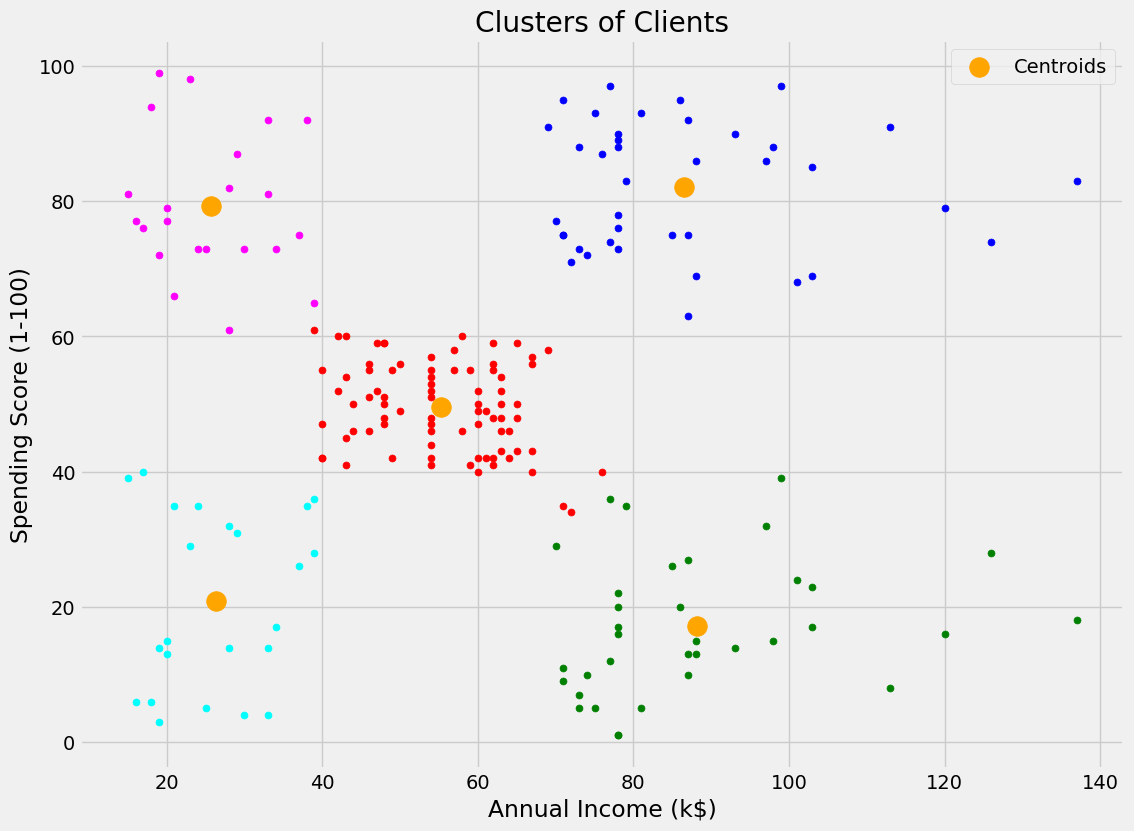

In [73]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']


plt.figure(figsize = (12,9))
for i in range(5):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size,
                c = colors[i], )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200,
            c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()



---
# **Interpretasi**

>Visualisasi tersebut menampilkan hasil clustering K-Means terhadap pelanggan berdasarkan Annual Income dan Spending Score, di mana data dibagi menjadi 5 cluster yang masing-masing ditunjukkan dengan warna berbeda. Setiap titik merepresentasikan satu pelanggan, sedangkan titik berwarna oranye berukuran lebih besar menunjukkan pusat cluster (centroid) yang menjadi representasi rata-rata karakteristik tiap kelompok. Dari grafik ini terlihat bahwa pelanggan dapat dikelompokkan ke dalam segmen dengan pola pendapatan dan perilaku belanja yang berbeda, seperti pelanggan berpendapatan tinggi dengan skor belanja tinggi, berpendapatan tinggi namun skor belanja rendah, serta kelompok dengan pendapatan dan pengeluaran sedang hingga rendah, sehingga hasil clustering ini dapat digunakan sebagai dasar strategi pemasaran yang lebih terarah.


---



In [74]:
#menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


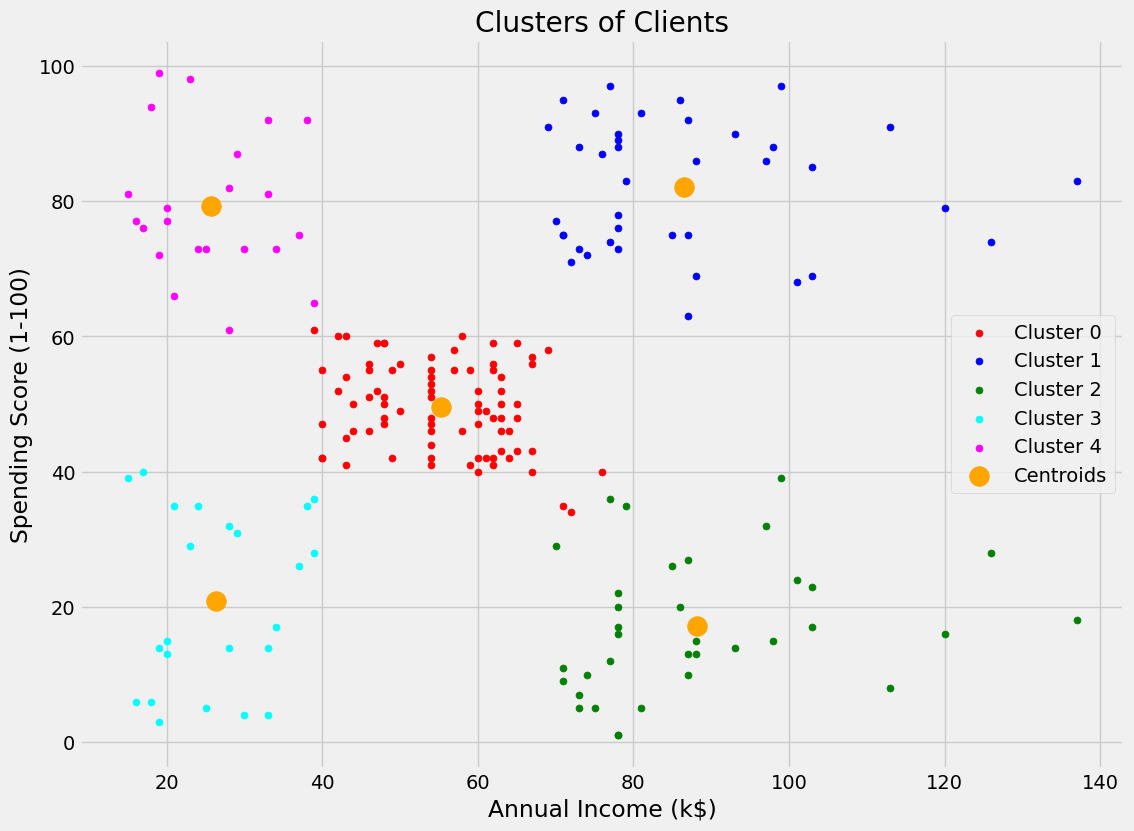

In [75]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3',
    4: 'Cluster 4'
}

plt.figure(figsize = (12,9))
for i in range(5):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size,
                c = colors[i], label=cluster_names.get(i, f'Cluster {i}') )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200,
            c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [76]:
df.groupby(['Cluster'])['Cluster'].count()

,Cluster
Cluster,
0,81
1,39
2,35
3,23
4,22


In [77]:
#menampilkan cluster tertentu
data_cluster1=df.loc[df['Cluster'] == 1]

In [78]:
data_cluster1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


### **Menentukan Jumlah Cluster Optimal**

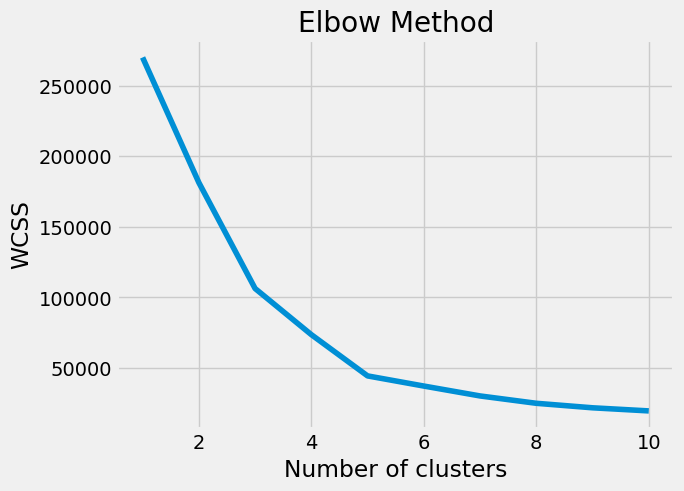

In [79]:
#Method 1 - Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

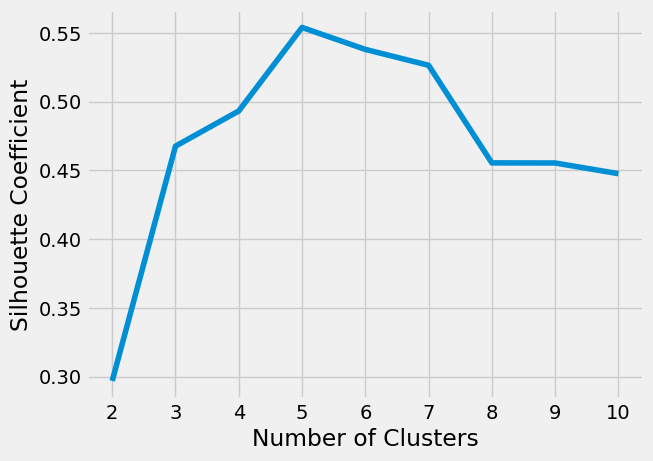

In [81]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### **Clustering Multi Fitur**

In [82]:
import plotly as py
import plotly.graph_objs as go

In [83]:
X = np.array(df.iloc[:,[2,3,4]])

In [84]:
X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

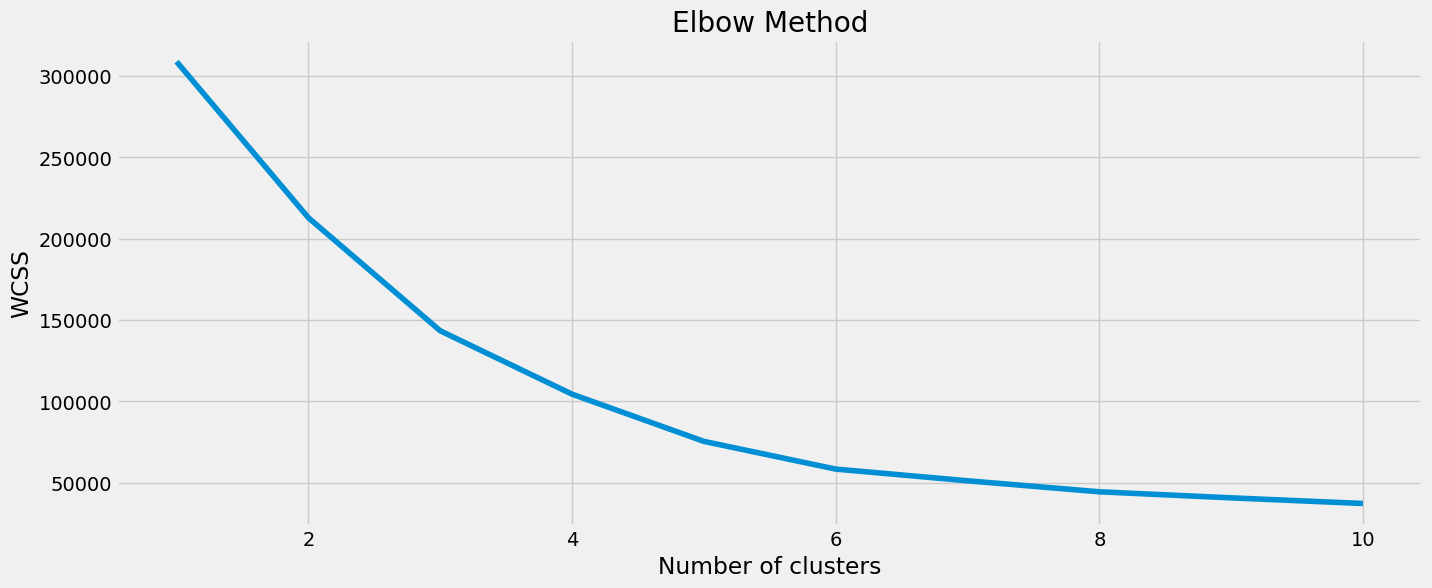

In [85]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

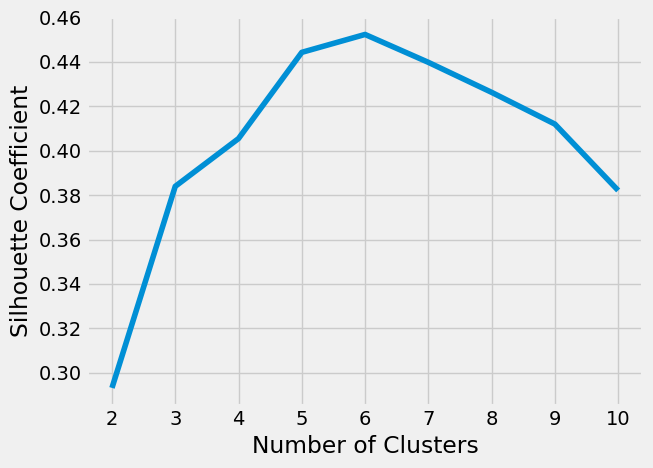

In [87]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Create Cluster**

In [88]:
kmeans6 = KMeans(n_clusters = 6, max_iter = 500, n_init = 10, random_state = 0)
kmeans6_preds = kmeans6.fit_predict(X)

In [89]:
#predict result
kmeans6_preds

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 0,
       4, 5, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [90]:
# Menampilkan pusat cluster
print(kmeans6.cluster_centers_)

[[27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [56.15555556 53.37777778 49.08888889]
 [44.14285714 25.14285714 19.52380952]
 [25.27272727 25.72727273 79.36363636]]


In [91]:
import plotly.graph_objs as go
import plotly.offline as py

# =========================
# Ambil label & centroid
# =========================
labels3 = kmeans6.labels_
centroids3 = kmeans6.cluster_centers_

df['ClusterMultiFeatures'] = labels3

# =========================
# Trace data (titik cluster)
# =========================
trace_data = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['ClusterMultiFeatures'],
        size=8,
        colorscale='Viridis',
        opacity=0.7
    ),
    name='Data Points'
)

# =========================
# Trace centroid
# =========================
trace_centroid = go.Scatter3d(
    x=centroids3[:, 0],   # Age
    y=centroids3[:, 1],   # Spending Score
    z=centroids3[:, 2],   # Annual Income
    mode='markers+text',
    marker=dict(
        color='red',
        size=14,
        symbol='diamond'
    ),
    text=[f'C{i}' for i in range(len(centroids3))],
    textposition='top center',
    name='Centroids'
)

# =========================
# Layout
# =========================
layout = go.Layout(
    title='3D Visualization of K-Means Clustering with Centroids',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    ),
    legend=dict(x=0.02, y=0.98)
)

# =========================
# Render
# =========================
fig = go.Figure(data=[trace_data, trace_centroid], layout=layout)
py.iplot(fig)

In [99]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

# Ambil fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Jalankan KMeans dengan 6 cluster
kmeans = KMeans(n_clusters=6, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataframe
df['ClusterMultiFeatures'] = kmeans_preds

# Hitung dan tampilkan jumlah data per cluster

cluster2_counts = df.groupby('ClusterMultiFeatures')['ClusterMultiFeatures'].count()
print(cluster_counts)


ClusterMultiFeatures
0    22
1    28
2    35
3    81
4    11
5    23
Name: ClusterMultiFeatures, dtype: int64


In [100]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import files  # khusus Google Colab

# Load data
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

# Ambil fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Jalankan KMeans dengan 6 cluster
kmeans = KMeans(n_clusters=6, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataframe
df['Cluster'] = kmeans_preds
df['ClusterMultiFeatures'] = kmeans6_preds

# Simpan dataframe ke CSV
file_name = "hasil_cluster_6.csv"
df.to_csv(file_name, index=False)

# Perintah untuk download file ke komputer kamu
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>